# Description 
- Perform FFT on a time series 
- Take the SVD of the fft dataset


## Packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import fft
from scipy import signal
import matplotlib.pyplot as plt
import figurefirst

In [2]:
dir = '~/Documents/Myfiles/DataAnalysis/data/Sprints/HighRes/'
df = pd.read_hdf(dir+'Windy.h5')

## Functions

In [172]:
def fft_of_data(data,dt):
    data = data-np.mean(data)
    N = data.shape[0] # Length of data.
    try:
        yf = 2.0/N * np.abs(fft.fft(data)[0:N])# Divide to bring the manitude to the magnitude of the orginal sinewave.
    except ZeroDivisionError:
        yf= 0

    # Remember the the y-data will be complex so you have to take the absolute value.
    xf = fft.fftfreq(N,dt)[:N]# Only take the first half of the data.
    amp.append(yf)
    freq.append(xf)
#     return(xf, yf) # xf = frequency array. yf = amplitude or power.

In [173]:
# This is a usefull function for segmenting pandas dataframes.
# Input: dataframe,column to use for query, limits.
# Use query to extract segments of data.
def segment_data(df, column_title, lower_lim, upper_lim):
    q = column_title + ' < ' + str(upper_lim) + ' and ' + column_title + ' > ' + str(lower_lim)
    new_df = df.query(q)
    return(new_df)

In [174]:
amp = []
freq = []
dt=df.master_time[1]-df.master_time[0]
avg_dist = []
i=0
# while i<=1288287: #notwindy
# while i<=566566: #notwindycontinuous
while i<=483483: #windy
# while i<=345345: #windycontinuous
    fft_of_data(np.array(df.odor[i:i+1001]),dt)
    avg_dist.append(np.mean(df.distance_from_source[i:i+1001]))
    i+=1001

In [175]:
index1 = np.where(np.array(avg_dist)<=10)
index2 = np.where((np.array(avg_dist)>10) & (np.array(avg_dist)<=30))
index3 = np.where(np.array(avg_dist)>30)


dist_close_freq = np.vstack(freq)[index1]
dist_close_amp = np.vstack(amp)[index1]
dist_middle_freq = np.vstack(freq)[index2]
dist_middle_amp = np.vstack(amp)[index2]
dist_far_freq = np.vstack(freq)[index3]
dist_far_amp = np.vstack(amp)[index3]

In [204]:
# # Create new Figure with black background
# k = np.arange(0,len(dist_close_freq),1)
# f = plt.figure(figsize=(20,20))
# # f.suptitle('FFT for Dist < 10meter')
# ax = f.add_subplot(projection='3d')
# ax.get_yaxis().set_visible(False)
# for i in range(len(dist_close_freq)):
#     ax.plot(dist_close_freq[i],dist_close_amp[i],zs=k[i], zdir='y', label='curve in (x, y)')

# ax.view_init(elev=0., azim=90)
# ax.set_xlabel('Frequency(Hz)')
# # ax.set_ylabel('Number of Sequence')
# ax.set_zlabel('Amplitude')

# #Removing yticks which are number of sequence
# ax.yaxis.set_ticklabels([])
# for line in ax.yaxis.get_ticklines():
#     line.set_visible(False)

# f.tight_layout()
# figurefirst.mpl_functions.set_fontsize(f, 14)
# # f.savefig('../../Figure/FFTCloseDist90.jpeg')

In [57]:
# count=0
# avg_dist = []
# amp = []
# freq = []
# dt=df.master_time[1]-df.master_time[0]
# i=0
# # while i <= 1288287:
# while i<=483483:
#     data = df.odor[i:i+1001]
#     data = data-np.mean(data)
#     avg_dist.append(np.mean(df.distance_from_source[i:i+1001]))
#     amp.append(np.fft.fft(data))
#     freq.append(np.fft.fftfreq(1001, d=dt))
#     i+=1001 ## 1001 makes 5 seconds   

In [196]:
index1 = np.where(np.array(avg_dist)<=10)
index2 = np.where((np.array(avg_dist)>10) & (np.array(avg_dist)<=30))
index3 = np.where(np.array(avg_dist)>30)


dist_close = np.vstack(amp)[index1]
dist_middle = np.vstack(amp)[index2]
dist_far = np.vstack(amp)[index3]

In [197]:
# Combine fft data and put into the SVD
arr_ffts1 = np.vstack(dist_close) #np.array([yf1,yf2])
U1,S1,V1 = np.linalg.svd(arr_ffts1.T, full_matrices = False) #Take the SVD to get U,S,V.

arr_ffts2 = np.vstack(dist_middle) #np.array([yf1,yf2])
U2,S2,V2 = np.linalg.svd(arr_ffts2.T, full_matrices = False) #Take the SVD to get U,S,V.

arr_ffts3 = np.vstack(dist_far) #np.array([yf1,yf2])
U3,S3,V3 = np.linalg.svd(arr_ffts3.T, full_matrices = False) #Take the SVD to get U,S,V.

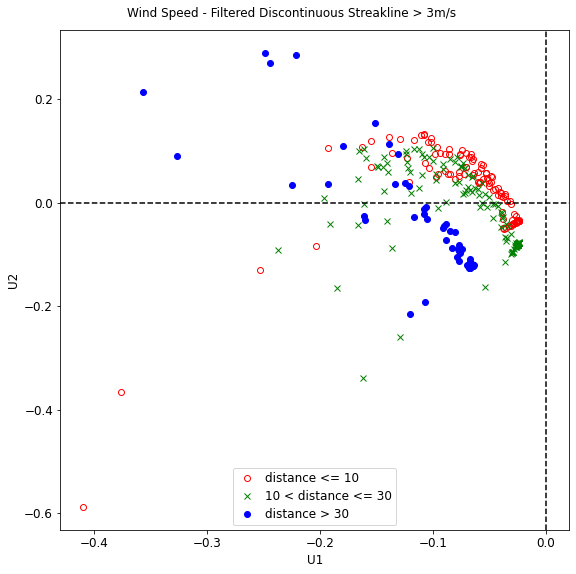

In [198]:
fig, ax = plt.subplots(figsize=[8,8])
ax.plot(V1[0,:],V1[1,:],'o', c='r', label='distance <= 10', fillstyle='none')
ax.plot(V2[0,:],V2[1,:],'x', c='g', label='10 < distance <= 30')
ax.plot(V3[0,:],V3[1,:],'o', c='b', label='distance > 30')
ax.axhline(0, linestyle = 'dashed', c = 'black')
ax.axvline(0, linestyle = 'dashed', c = 'black')
# ax.set_ylim(0.6,-0.6)
# ax.set_xlim(0.5,-0.5)
ax.legend()
ax.set_xlabel('U1')
ax.set_ylabel('U2')

fig.suptitle('Wind Speed - Filtered Discontinuous Streakline > 3m/s')
fig.tight_layout()
figurefirst.mpl_functions.set_fontsize(fig, 12)

# fig.savefig('../../Figure/SVDWindyCont.jpeg')

## Code

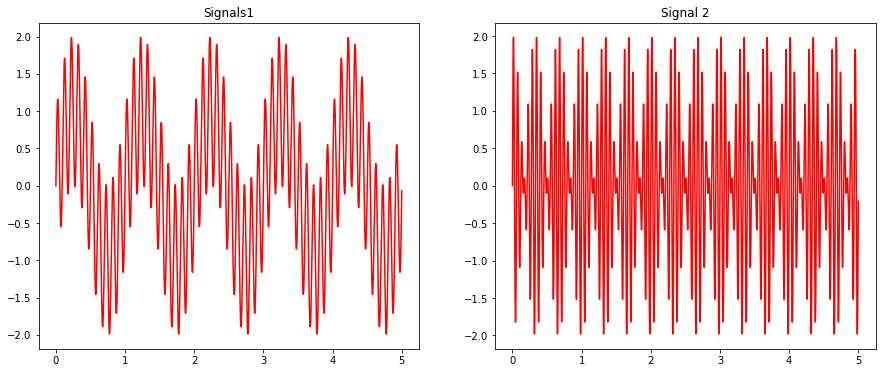

In [105]:
# Simulation of some data
dt = 0.001
t = np.arange(0,5,dt)
w1 = 1# Ws are signal frequencies.
w2 = 10
w3 = 15
w4 = 18
signal1 = np.sin(w1*2*np.pi*t)+np.sin(w2*2*np.pi*t)# Sin wave with two frequencies
signal2 = np.sin(w3*2*np.pi*t)+np.sin(w4*2*np.pi*t)# Sin wave with two frequencies

fig = plt.figure(figsize=[15,6])
ax_s = fig.add_subplot(1,2,1)
ax_s.plot(t,signal1, 'r')
ax_s.set_title('Signals1')

ax_s1 = fig.add_subplot(1,2,2)
ax_s1.plot(t,signal2, 'r')
ax_s1.set_title('Signal 2')

plt.show()

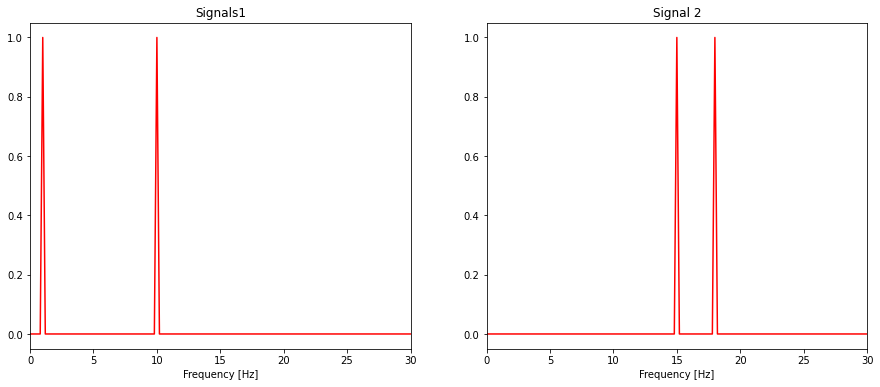

In [106]:
# Get frequency content
xf1, yf1 = fft_of_data(signal1, dt)
xf2, yf2 = fft_of_data(signal2, dt)

fig = plt.figure(figsize=[15,6])
ax_s = fig.add_subplot(1,2,1)
ax_s.plot(xf1, yf1, 'r')
ax_s.set_title('Signals1')
ax_s.set_xlabel('Frequency [Hz]')
ax_s.set_xlim(0,30)

ax_s1 = fig.add_subplot(1,2,2)
ax_s1.plot(xf2, yf2, 'r')
ax_s1.set_title('Signal 2')
ax_s1.set_xlabel('Frequency [Hz]')
ax_s1.set_xlim(0,30)

plt.show()

# Observe where the spikes are.

In [57]:
# Combine fft data and put into the SVD
arr_ffts = np.vstack(np.abs(amp)) #np.array([yf1,yf2])
U,S,V = np.linalg.svd(arr_ffts.T, full_matrices = False) #Take the SVD to get U,S,V.

In [117]:
U.shape

(1001, 1001)

In [116]:
S.shape

(1001,)

In [114]:
V.shape

(1001, 1288)

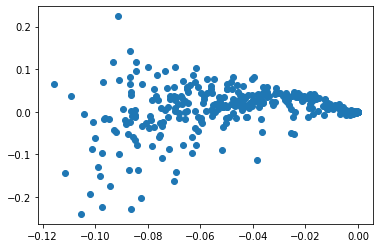

In [58]:
plt.plot(V[0,:],V[1,:],'o')
# plt.xlim(-2,2)
# plt.ylim(-2,2)